In [1]:
import pandas as pd 
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("train.csv")
pd.set_option("display.max_columns", None)
cluster = pd.read_csv("df_veloc.csv")

In [3]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df['month'] = df['datetime'].dt.month

In [6]:
df['day'] = df['datetime'].dt.day

In [7]:
df['hours'] = df['datetime'].dt.hour

In [8]:
for i in range(1,13):
    month_mask = (df['month'] == i)
    if i == 1 or i == 2 or i == 12:
        df.loc[month_mask, 'season'] = 4
    elif i == 3 or i == 4 or i == 5:
        df.loc[month_mask, 'season'] = 1
    elif i == 6 or i == 7 or i == 8:
        df.loc[month_mask, 'season'] = 2
    else:
        df.loc[month_mask, 'season'] = 3

In [9]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22


In [10]:
df['weekday'] = df['datetime'].dt.weekday

In [11]:
df['date'] = df['datetime'].dt.date

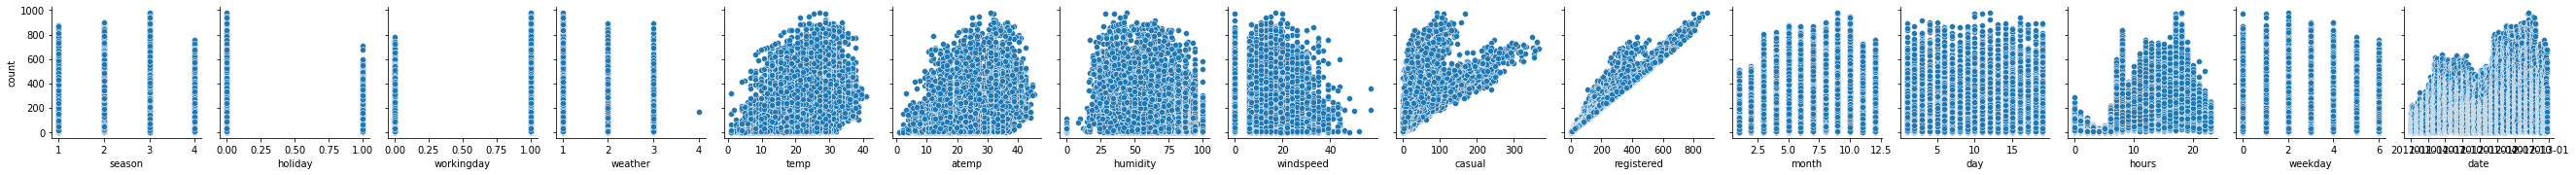

In [12]:
ax = sns.pairplot(data=df, x_vars=df.drop(['count', 'datetime'], axis=1).columns, y_vars='count')
plt.show(ax)


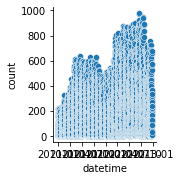

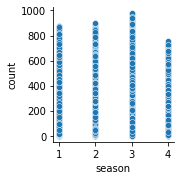

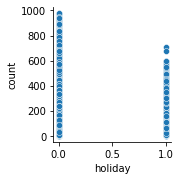

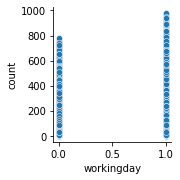

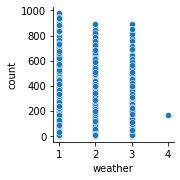

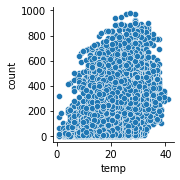

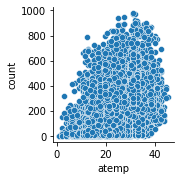

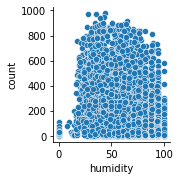

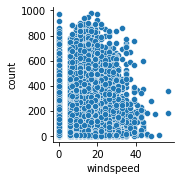

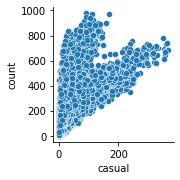

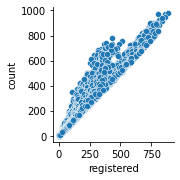

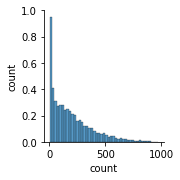

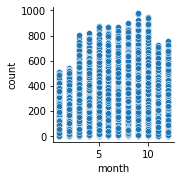

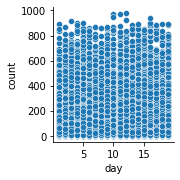

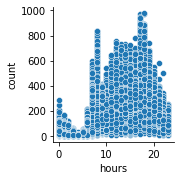

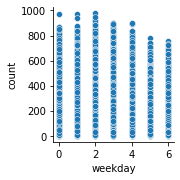

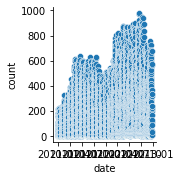

In [13]:
for col in df.columns:
    ax = sns.pairplot(data=df, x_vars=col, y_vars='count')
    plt.show(ax)

<Figure size 1440x1440 with 0 Axes>

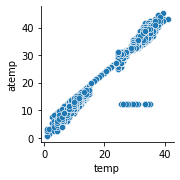

In [14]:
plt.figure(figsize=(20,20))
ax = sns.pairplot(data=df, x_vars=['temp'], y_vars='atemp')

plt.show()

In [15]:
df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'atemp'] = df.loc[(df['atemp'] == 12.12) & (df['temp']>20), 'temp'] 


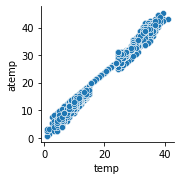

In [16]:
ax = sns.pairplot(data=df, x_vars=['temp'], y_vars='atemp')

In [17]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
month         0
day           0
hours         0
weekday       0
date          0
dtype: int64

In [18]:
mask_night = (df['hours'] < 6) | (df['hours'] > 23)
df.loc[mask_night, 'part_of_day'] = 1

In [19]:
mask_morning = (df['hours']>5) & (df['hours'] < 13)
df.loc[mask_morning, 'part_of_day'] = 3

In [20]:
mask_afternoon = (df['hours']> 12) & (df['hours'] < 19)
df.loc[mask_afternoon, 'part_of_day'] = 4

In [21]:
mask_midnight = (df['hours']>18) & (df['hours'] <= 23)
df.loc[mask_midnight, 'part_of_day'] = 2

In [22]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,weekday,date,part_of_day
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,5,2011-01-01,1.0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,5,2011-01-01,1.0
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,5,2011-01-01,1.0
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,5,2011-01-01,1.0
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,5,2011-01-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,2,2012-12-19,2.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,2,2012-12-19,2.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,2,2012-12-19,2.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22,2,2012-12-19,2.0


In [23]:
mask_2012 = (df['datetime'].dt.year == 2012) 
df.loc[mask_2012 & (df['month']>7)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hours,weekday,date,part_of_day
8607,2012-08-01 00:00:00,2,0,1,1,27.88,31.820,79,11.0014,3,44,47,8,1,0,2,2012-08-01,1.0
8608,2012-08-01 01:00:00,2,0,1,1,27.06,30.305,83,6.0032,5,28,33,8,1,1,2,2012-08-01,1.0
8609,2012-08-01 02:00:00,2,0,1,1,26.24,28.790,83,7.0015,0,13,13,8,1,2,2,2012-08-01,1.0
8610,2012-08-01 03:00:00,2,0,1,1,26.24,28.790,83,7.0015,0,7,7,8,1,3,2,2012-08-01,1.0
8611,2012-08-01 04:00:00,2,0,1,2,26.24,29.545,78,8.9981,1,3,4,8,1,4,2,2012-08-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,2,2012-12-19,2.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,2,2012-12-19,2.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,2,2012-12-19,2.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22,2,2012-12-19,2.0


In [24]:
df['difference_atemp_temp'] = df['atemp'] - df['temp']

In [25]:
from dython.nominal import associations

## heat map 

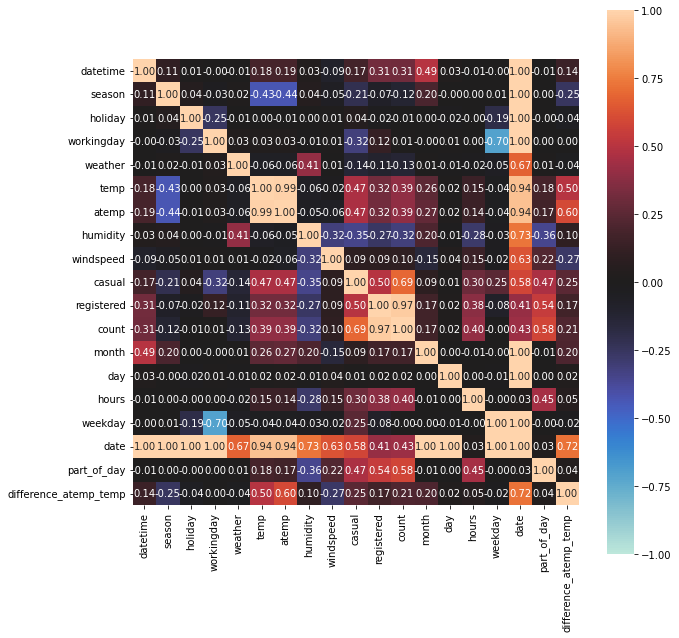

In [26]:
selected_column= df
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

<AxesSubplot:>

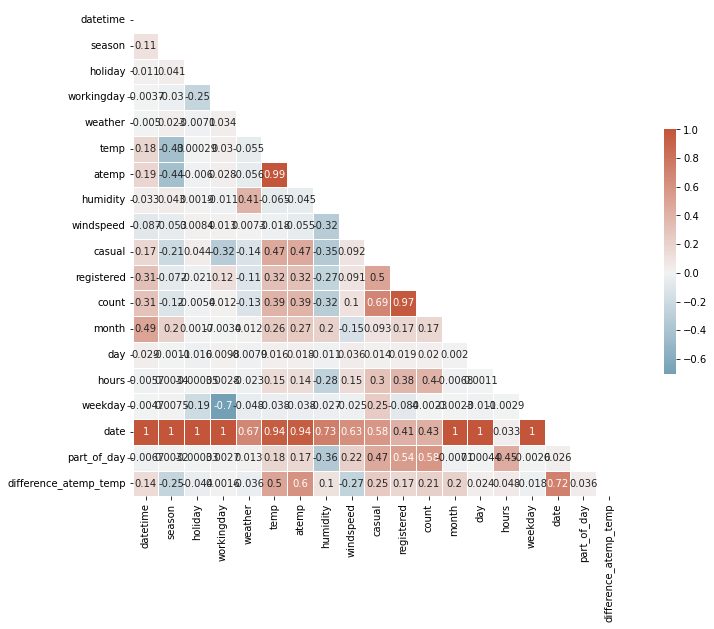

In [27]:
mask = np.triu(np.ones_like(categorical_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(categorical_correlation['corr'], mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})